### Метрики

In [2]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
churn_df = pd.read_csv("telecom_churn_clean.csv")
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
knn = KNeighborsClassifier(n_neighbors = 7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=2024)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[697  20]
 [ 93  24]]


In [3]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       717
           1       0.55      0.21      0.30       117

    accuracy                           0.86       834
   macro avg       0.71      0.59      0.61       834
weighted avg       0.84      0.86      0.84       834



### Логистическая регрессия

In [4]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2024)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [5]:
y_pred_probs = logreg.predict_proba(X_test)[:,1]
print(y_pred_probs)

[0.06914576 0.07683437 0.22719884 0.32022282 0.22252364 0.10778573
 0.17010482 0.06353267 0.22483239 0.07205972 0.08059762 0.09383823
 0.0457623  0.20578858 0.11545142 0.15996015 0.10922449 0.0664908
 0.19767963 0.21989633 0.09395931 0.2586334  0.09002878 0.1169032
 0.19680865 0.0876518  0.04042599 0.18862432 0.21194426 0.2426738
 0.13224084 0.10860341 0.14926926 0.14743433 0.13778171 0.31655209
 0.09725987 0.15602114 0.13970153 0.23466075 0.11253299 0.06512229
 0.198197   0.25914539 0.17972695 0.06016962 0.06693228 0.16751442
 0.09929962 0.18707011 0.1318248  0.24781836 0.10847727 0.09313582
 0.06493102 0.10591534 0.10404123 0.16048965 0.10290932 0.16315145
 0.13263591 0.04925117 0.19005132 0.13331575 0.08066805 0.1883939
 0.25018057 0.15645765 0.04050916 0.1995911  0.15076045 0.08824181
 0.07613837 0.12892145 0.13897599 0.1403586  0.09043232 0.07871742
 0.13874008 0.10996404 0.13366125 0.27607286 0.08505146 0.15449316
 0.18337388 0.13881611 0.25836708 0.29850066 0.11437908 0.2207759


### ROC-кривая

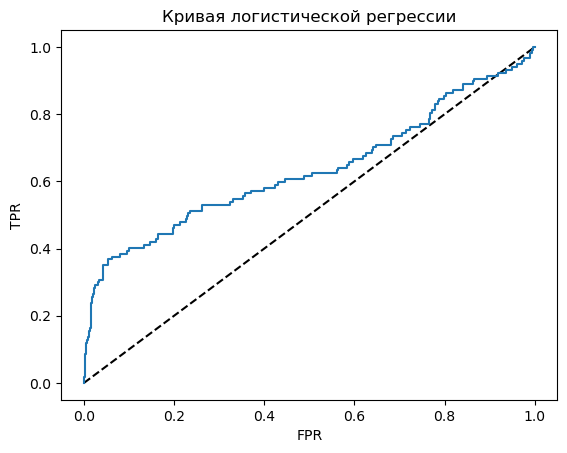

In [6]:
from sklearn.metrics import roc_curve
fpr, tpr, tresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Кривая логистической регрессии")
plt.show()

In [7]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.6333130684595121


### Поиск по сетки кроссвалидации

In [8]:
import pandas as pd
import numpy as np

diabetes_df = pd.read_csv("diabetes_clean.csv")
diabetes_df = diabetes_df[diabetes_df["bmi"]>0]
diabetes_df = diabetes_df[diabetes_df["glucose"]>0]
diabetes_df = diabetes_df[diabetes_df["insulin"]>0]

In [10]:
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2024)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
kf = KFold(n_splits=10, shuffle=True, random_state=2024)
param_grid = {"alpha": np.linspace(0.0001,1,10),
"solver": ["sag", "lsqr"]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

/Library/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: Con

{'alpha': 0.5556, 'solver': 'lsqr'} 0.45492333925963424


/Library/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: Con

In [14]:
from sklearn.model_selection import RandomizedSearchCV
kf = KFold(n_splits=10, shuffle=True, random_state=2024)
param_grid = {"alpha": np.linspace(0.0001,1,10),
"solver": ["sag", "lsqr"]}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=5)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'lsqr', 'alpha': 0.5556} 0.45492333925963424


/Library/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: Con

### Классификационные деревья

In [16]:
from sklearn.tree import DecisionTreeClassifier
wbc = pd.read_csv("wbc.csv")
print(wbc.head(5))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [17]:
X = wbc.drop(["diagnosis", "id"], axis=1).values
y = wbc["diagnosis"].values
print(X.shape, y.shape)

(569, 31) (569,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2024, stratify=y)
dt = DecisionTreeClassifier(max_depth=2, random_state=2024)

In [19]:
from sklearn.metrics import accuracy_score
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9230769230769231
